# 2017-1 경제성공학 프로젝트
## 중고차 매매 최적 시기
### 차종: 그렌저 IG
### Study period: 20년

- 기타 변수 => [parameters.py](./parameters.py)
-  그래프 함수 => [utils.py](./utils.py)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from utils import *
from parameters import *
%matplotlib inline

## 그래프 폰트

In [2]:
import matplotlib
matplotlib.rc('font',
              family='NanumGothic',
             size=22)

In [3]:
# 예시 연도: 6년마다 차량 재구매
demo_car_interval = 6

# 1. 비용

## 1.1. 구입비

### 자동차 구입비

- 연초에 구입
- 매년 인플레이션 적용

In [4]:
def car_purchase_cash_flow(car_interval, study_period=study_period):
    cash_flow = np.zeros(study_period+1)
    car_cost = car_price
    for year in range(study_period+1):
        car_cost *= (1+f) # 인플레이션
        if year % car_interval == 0:
            cash_flow[year] = car_cost
    return cash_flow

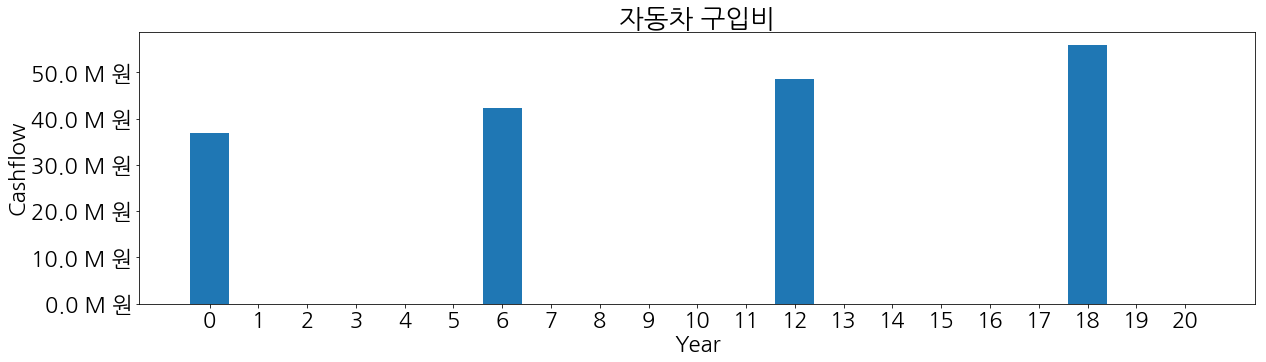

In [5]:
show_cash_flow(
    title='자동차 구입비',
    data=car_purchase_cash_flow(demo_car_interval),
    study_period=study_period)

### 취득세

- 매년 구입과 함께 지출
- 매년 인플레이션 적용

In [6]:
def acquisition_cash_flow(car_interval, study_period=study_period):
    cash_flow = np.zeros(study_period+1)
    tax = car_price * acquisition_rate
    for year in range(study_period+1):
        tax *= (1+f) # 인플레이션
        if year % car_interval == 0:
            cash_flow[year] = tax
    return cash_flow

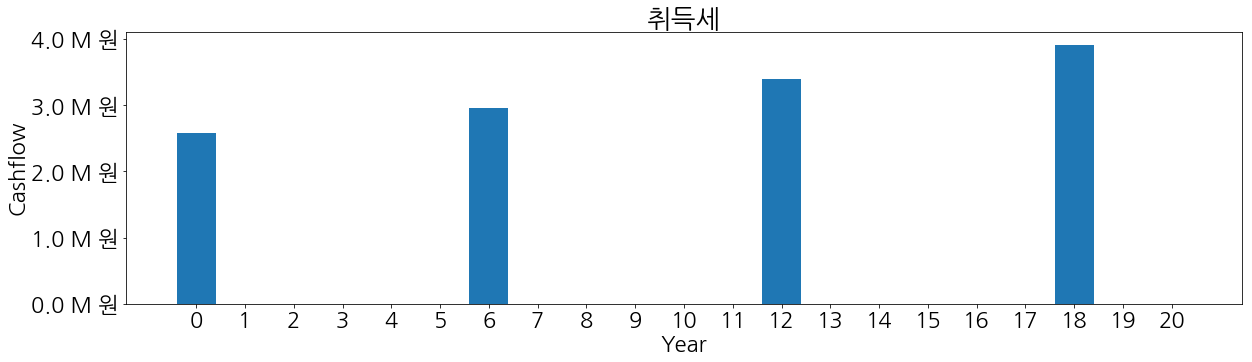

In [7]:
show_cash_flow(
    title='취득세',
    data=acquisition_cash_flow(demo_car_interval),
    study_period=study_period)

### 총 구입비

In [8]:
def total_purchase_cash_flow(car_interval, study_period=study_period):
    cash_flow = \
        car_purchase_cash_flow(car_interval, study_period=study_period) + \
        acquisition_cash_flow(car_interval, study_period=study_period)
    return cash_flow

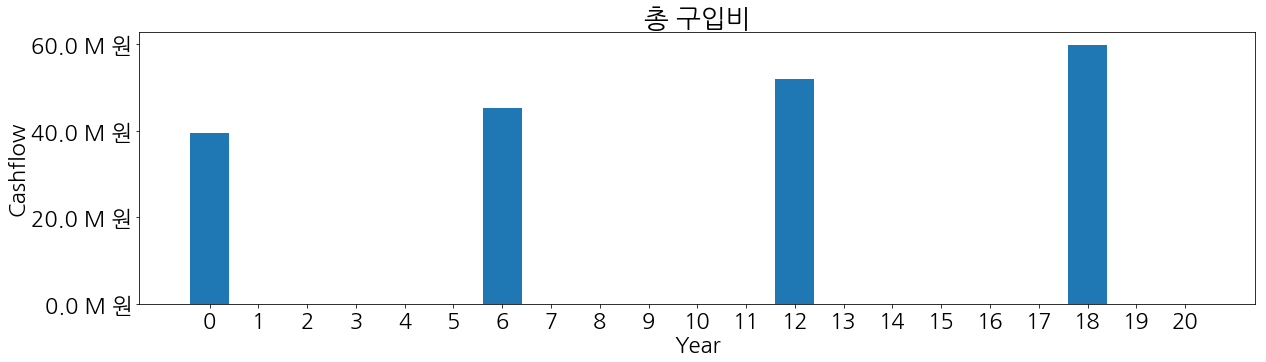

In [9]:
show_cash_flow(
    title='총 구입비',
    data=total_purchase_cash_flow(demo_car_interval),
    study_period=study_period)

## 1.2. 유지비

### 자동차보험

- 자동차 구입과 함께 연초에 지출
- 매 구매시마다 인플레이션과 함께 보험료 갱신

In [10]:
def car_insurance_cash_flow(car_interval, study_period=study_period):
    cash_flow = np.zeros(study_period+1)
    for year in range(study_period+1):
        vehicle_age = year % car_interval
        vehicle_generation = year // car_interval
        
        insurance_fee = car_insurance[vehicle_age]
        insurance_fee *= (1+f) ** (vehicle_generation * car_interval)
        cash_flow[year] = insurance_fee
    cash_flow[-1] = 0
    return cash_flow

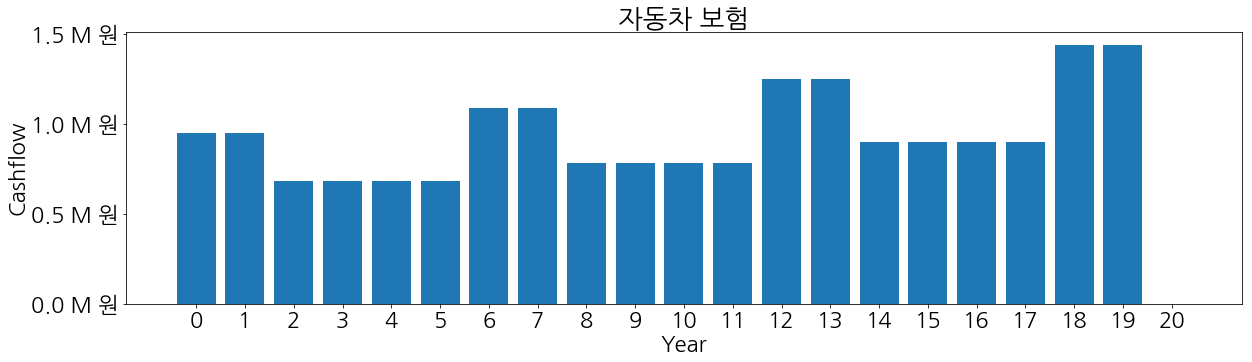

In [11]:
show_cash_flow(
    title='자동차 보험',
    data=car_insurance_cash_flow(demo_car_interval),
    study_period=study_period)

### 운전자보험

- 연초에 지출
- 가입 후 처분시까지 같은 보험료 지출

In [12]:
def driver_insurance_cash_flow(car_interval, study_period=study_period):
    cash_flow = np.zeros(study_period+1)
    for year in range(study_period+1):
        vehicle_generation = year // car_interval
        
        insurance_fee = driver_insurance
        insurance_fee *= (1+f) ** (vehicle_generation * car_interval)
        cash_flow[year] = insurance_fee
    cash_flow[-1] = 0
    return cash_flow

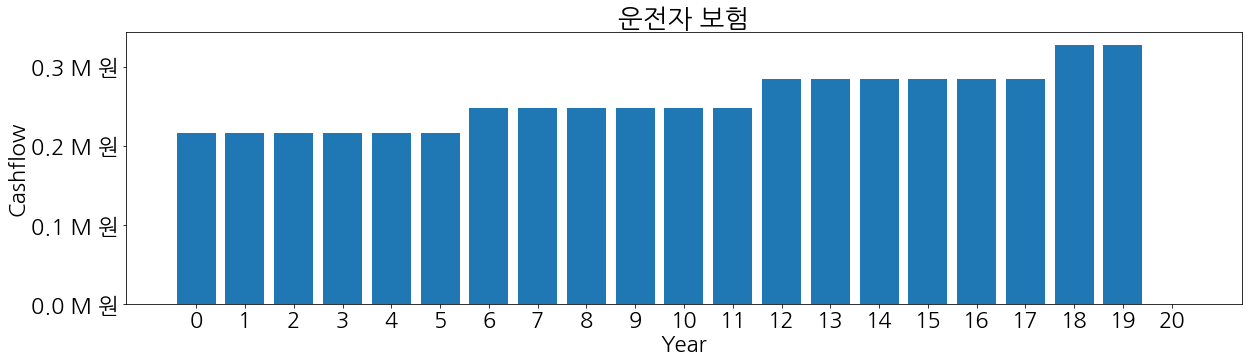

In [13]:
show_cash_flow(
    title='운전자 보험',
    data=driver_insurance_cash_flow(demo_car_interval),
    study_period=study_period)

### 유류비

- 연초에 지출
- 차 구매/판매와 직접적 관련 x, 인플레이션에만 영향

In [14]:
def oil_price_cash_flow(car_interval, study_period=study_period):
    cash_flow = np.zeros(study_period+1)
    for year in range(study_period+1):
        oil_cost = annual_oil_cost
        oil_cost *= (1+f) ** year # 인플레이션
        cash_flow[year] = oil_cost
    cash_flow[-1] = 0
    return cash_flow

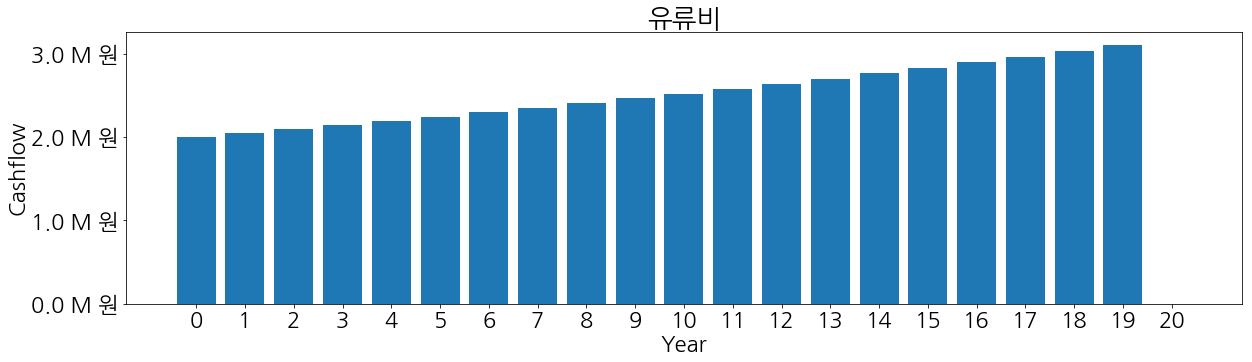

In [15]:
show_cash_flow(
    title='유류비',
    data=oil_price_cash_flow(demo_car_interval),
    study_period=study_period)

### 자동차세

- 연초에 지출
- 자동차 연식이 자동차세는 감소
- 매년 세금이 인플레이션에 의해 증가

In [16]:
def car_tax_cash_flow(car_interval, study_period=study_period):
    cash_flow = np.zeros(study_period+1)
    for year in range(study_period+1):
        vehicle_age = year % car_interval
        
        tax = car_taxes[vehicle_age]
        tax *= (1+f) ** year
        cash_flow[year] = tax
    cash_flow[-1] = 0
    return cash_flow

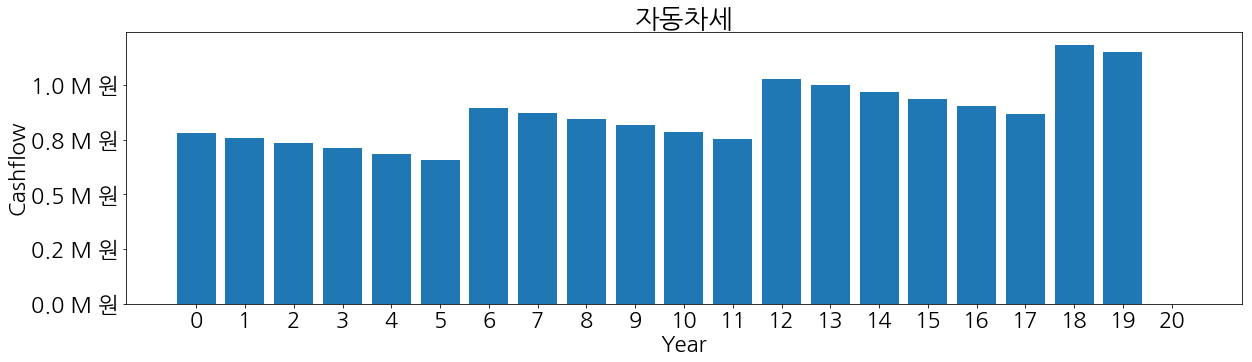

In [17]:
show_cash_flow(
    title='자동차세',
    data=car_tax_cash_flow(demo_car_interval),
    study_period=study_period)

### 주차비

- 연초에 발생
- 차량 구매와 관계 x
- 매년 인플레이션과 함께 상승

In [18]:
def parking_fee_cash_flow(car_interval, study_period=study_period):
    cash_flow = np.zeros(study_period+1)
    for year in range(study_period+1):
        parking_cost = parking_fee
        parking_cost *= (1+f) ** year
        cash_flow[year] = parking_cost
    cash_flow[-1] = 0
    return cash_flow

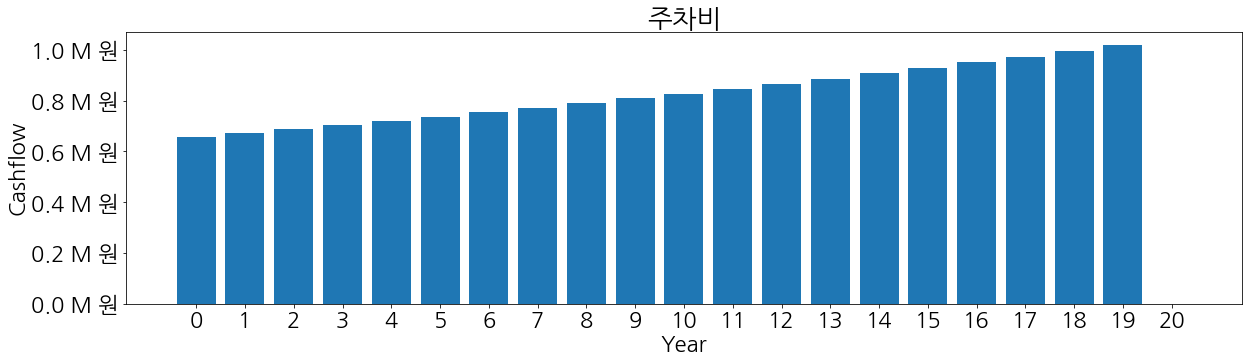

In [19]:
show_cash_flow(
    title='주차비',
    data=parking_fee_cash_flow(demo_car_interval),
    study_period=study_period)

### 부품비

- 부품의 교체 주기 연수는 (교체 주기 주행거리 / 연간 주행거리) 를 올림한 값
- 구입한 당 해는 지출 x
- 배터리, 타이어가 부품비의 대부분을 차지

In [20]:
item_df

,교체 주기 주행거리 (km),교체 주기 (년),부품 가격,개수,공임,수리비
엔진오일,15000,2,7150,6.0,20700,63600
미션오일,60000,5,4200,7.5,34500,66000
에어필터,30000,3,14160,1.0,13800,27960
디퍼렌셜오일,120000,9,66010,1.0,28175,94185
연료필터,60000,5,55380,1.0,34500,89880
타이밍벨트,100000,8,110300,1.0,28175,138475
냉각수,200000,15,7680,3.0,28175,51215
브레이크패드,62890,5,28390,1.0,34500,62890
브레이크라이닝,120000,9,16380,1.0,28175,44555
브레이크오일,40000,3,15100,1.0,27600,42700


##### 부품별 세부 그래프

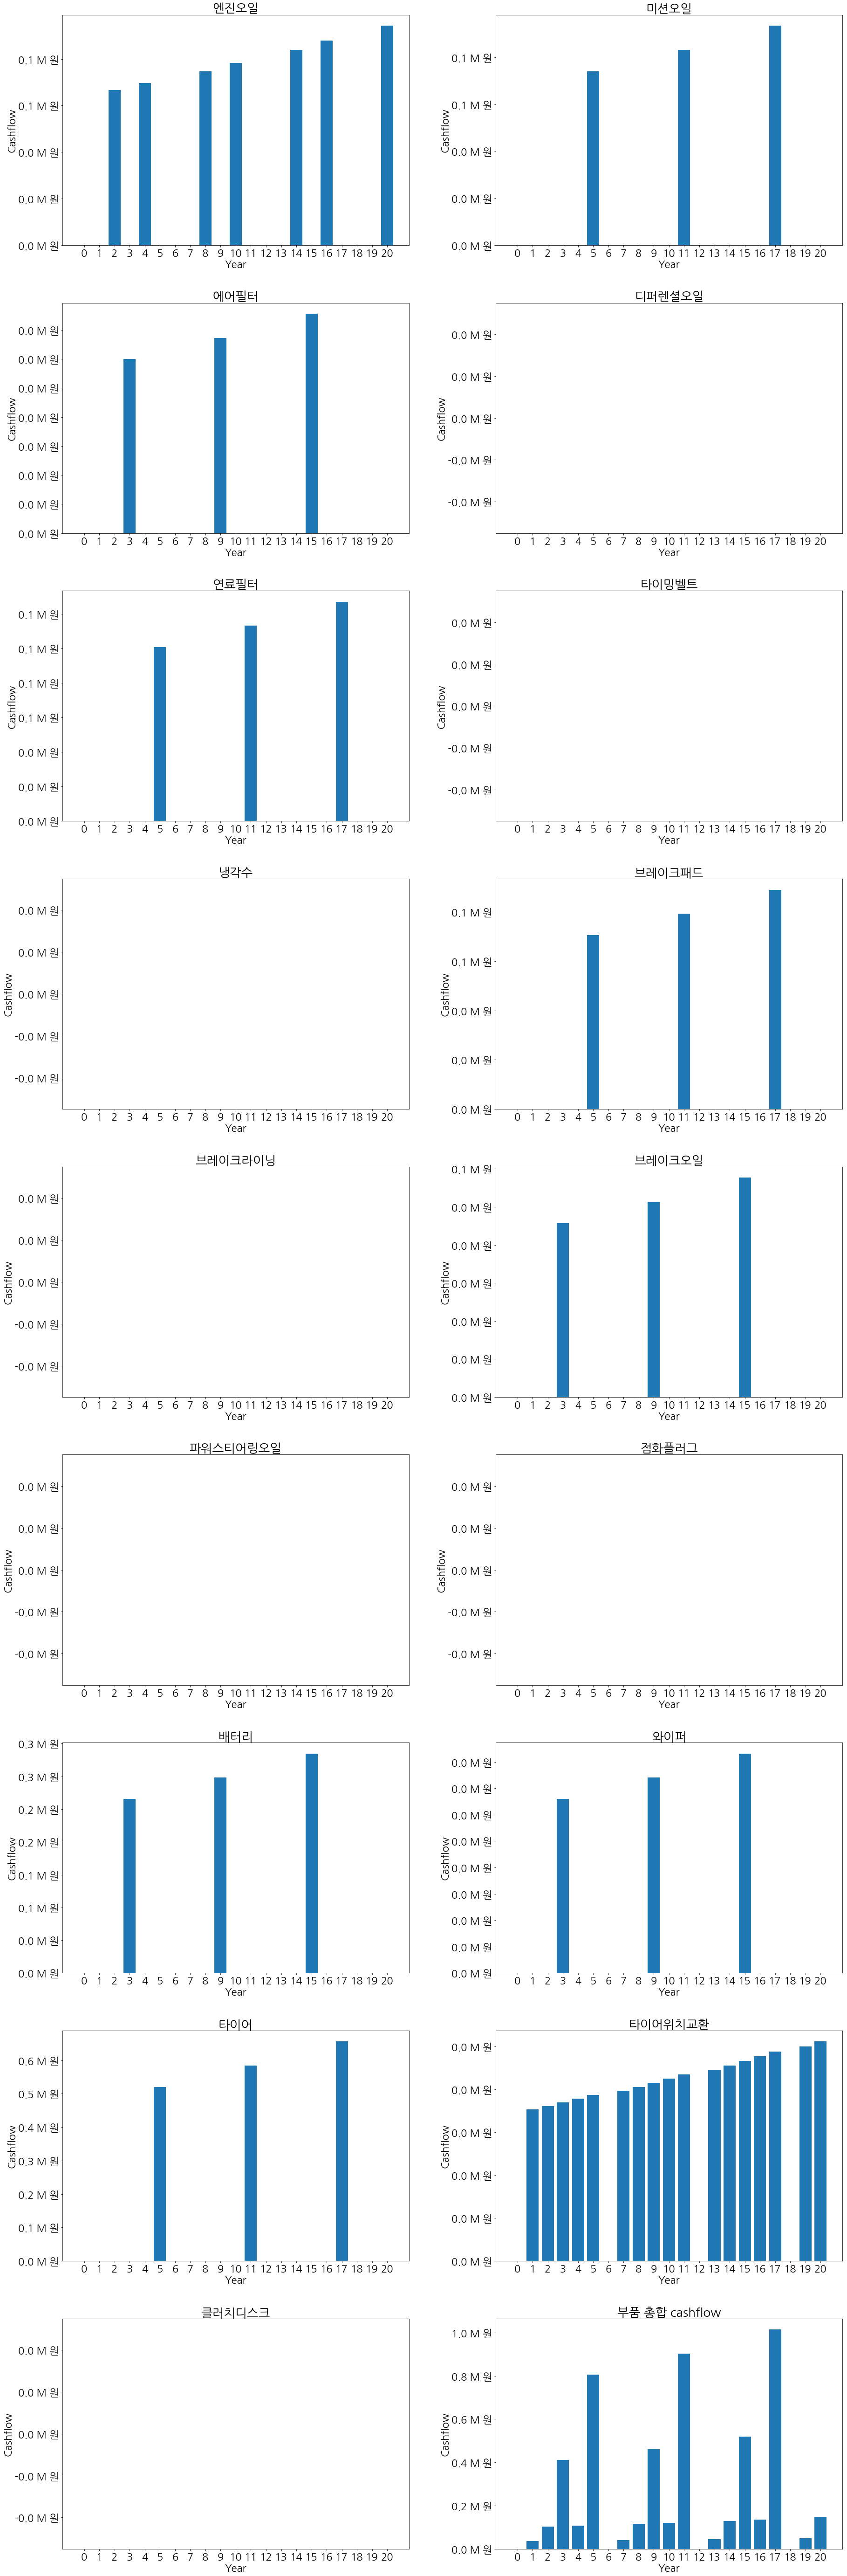

In [21]:
plot_item_cash_flow(demo_car_interval, item_df, study_period, f)

#### 부품 총 비용

In [22]:
def items_cash_flow(car_interval, study_period=study_period):
    total_cash_flow = np.zeros(study_period+1)
    
    for item_name, row in item_df.iterrows():
        cash_flow = item_cash_flow(
            car_interval=car_interval,
            item_interval=row['교체 주기 (년)'],
            item_price=row['수리비'],
            study_period=study_period,
            f=f)
        total_cash_flow += cash_flow
    
    return total_cash_flow

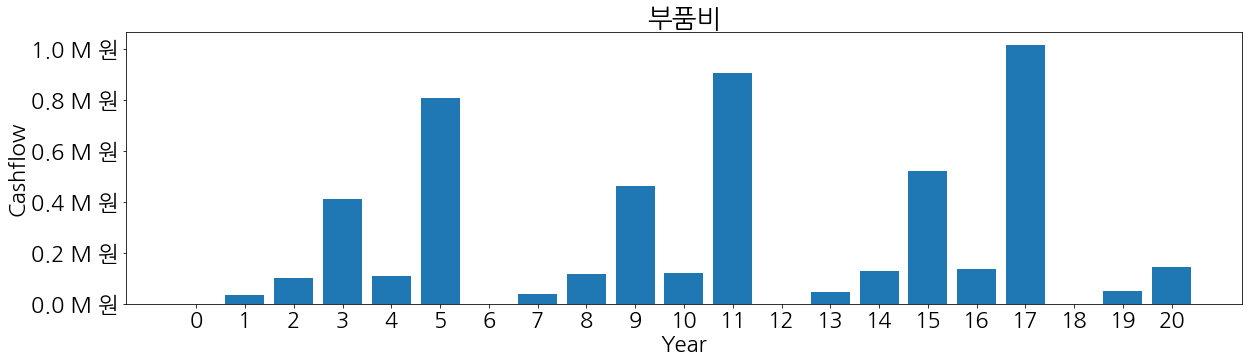

In [23]:
show_cash_flow(
    title='부품비',
    data=items_cash_flow(demo_car_interval),
    study_period=study_period)

### 총 유지비

In [24]:
def total_maintenance_cash_flow(car_interval, study_period=study_period):
    cash_flow = \
        car_insurance_cash_flow(car_interval, study_period=study_period) + \
        driver_insurance_cash_flow(car_interval, study_period=study_period) +\
        oil_price_cash_flow(car_interval, study_period=study_period) + \
        car_tax_cash_flow(car_interval, study_period=study_period) +\
        parking_fee_cash_flow(car_interval, study_period=study_period) + \
        items_cash_flow(car_interval, study_period=study_period)
        
    return cash_flow

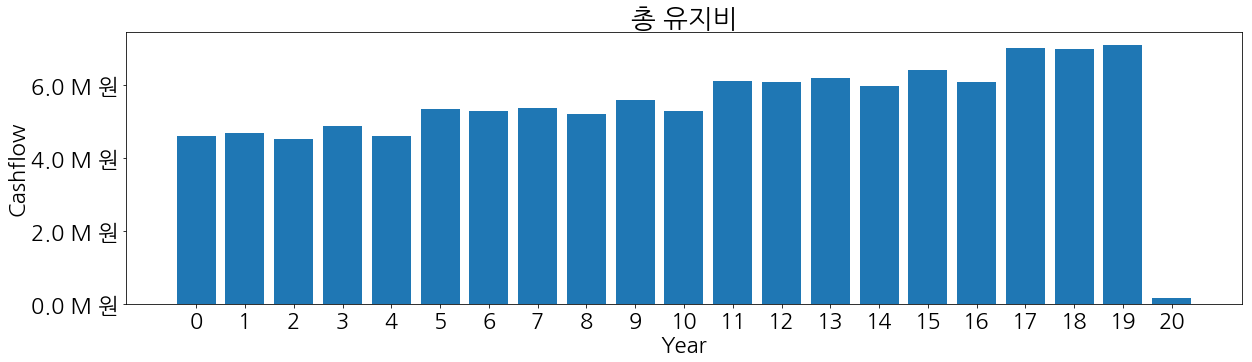

In [25]:
show_cash_flow(
    title='총 유지비',
    data=total_maintenance_cash_flow(demo_car_interval),
    study_period=study_period)

## 1.3. 총 비용

In [26]:
def total_cost_cash_flow(car_interval, study_period=study_period):
    cash_flow = \
        total_purchase_cash_flow(car_interval, study_period=study_period) + \
        total_maintenance_cash_flow(car_interval, study_period=study_period)
        
    return cash_flow

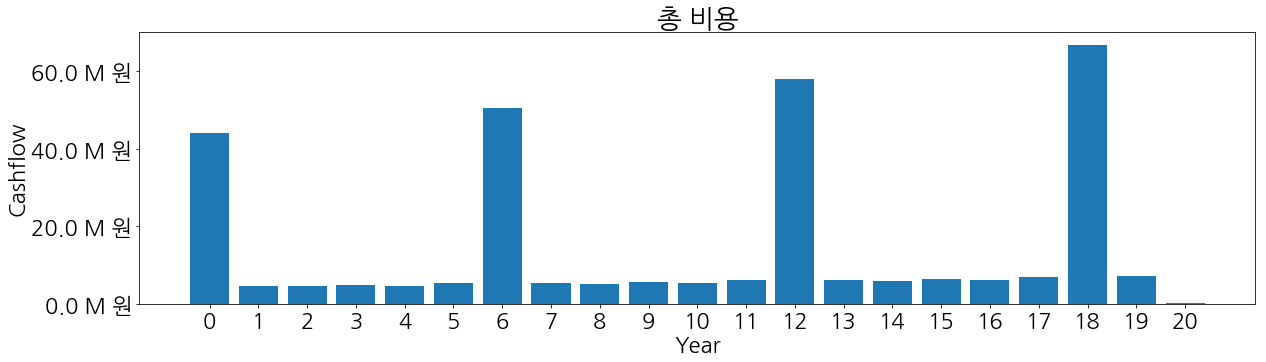

In [27]:
show_cash_flow(
    title='총 비용',
    data=total_cost_cash_flow(demo_car_interval),
    study_period=study_period)

# 2. 소득

## 처분소득 = 총 소득

- 매 재구매 주기마다 발생
- 인플레이션 적용
- 마지막 해에는 무조건 처분

In [28]:
def salvage_cash_flow(car_interval, study_period=study_period):
    cash_flow = np.zeros(study_period+1)
    for year in range(study_period+1):
        vehicle_age = year % car_interval
        
        if vehicle_age == 0 or year == study_period:
            
            if vehicle_age == 0:
                # old car's age
                vehicle_age = car_interval
            salvage_rate = salvage_rates[vehicle_age-1]

            salvage_value = car_price * salvage_rate

            salvage_value *= (1+f) ** year # 인플레이션

            cash_flow[year] = salvage_value
    cash_flow[0] = 0
    return cash_flow

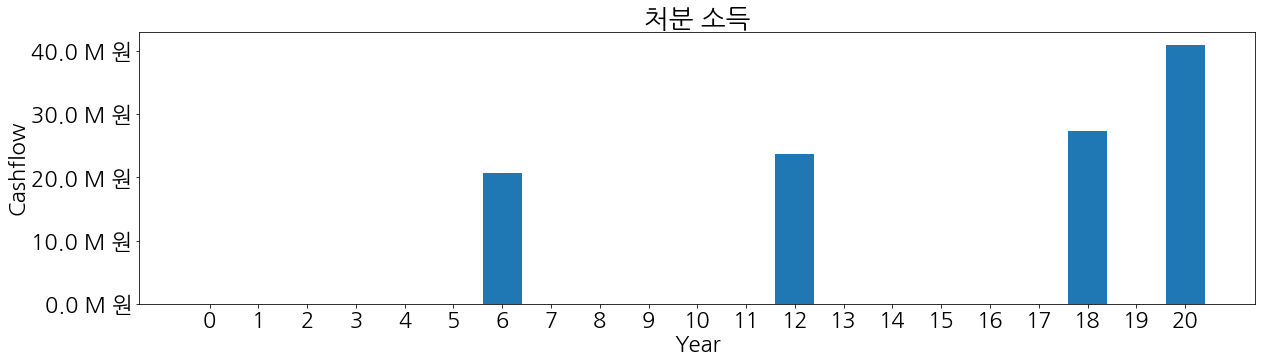

In [29]:
show_cash_flow(
    title='처분 소득',
    data=salvage_cash_flow(demo_car_interval),
    study_period=study_period)

# 3. 소득 - 비용

In [30]:
def net_cash_flow(car_interval, study_period=study_period):
    cash_flow = \
        - total_cost_cash_flow(car_interval, study_period=study_period) + \
        salvage_cash_flow(car_interval, study_period=study_period)
    return cash_flow

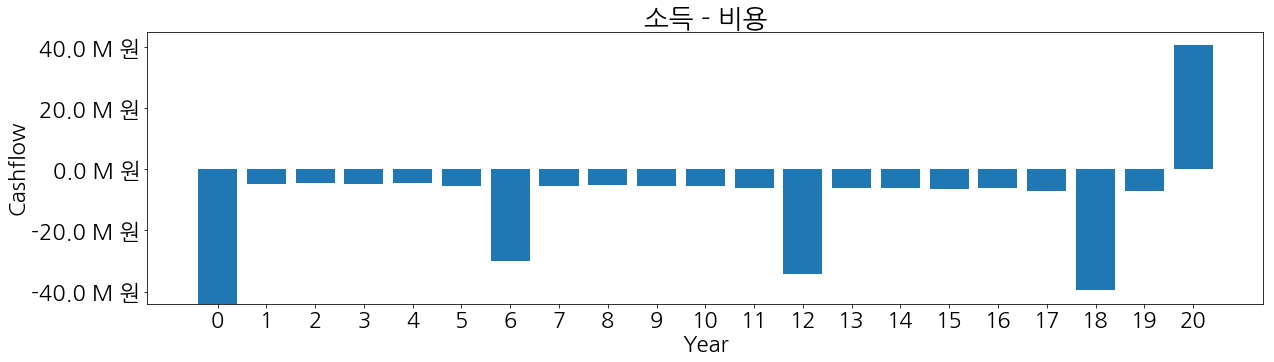

In [31]:
show_cash_flow(
    title='소득 - 비용',
    data=net_cash_flow(demo_car_interval),
    study_period=study_period)

# 4. 구매주기에 따른 총 비용 - 소득

## 4.1. 현재 가치

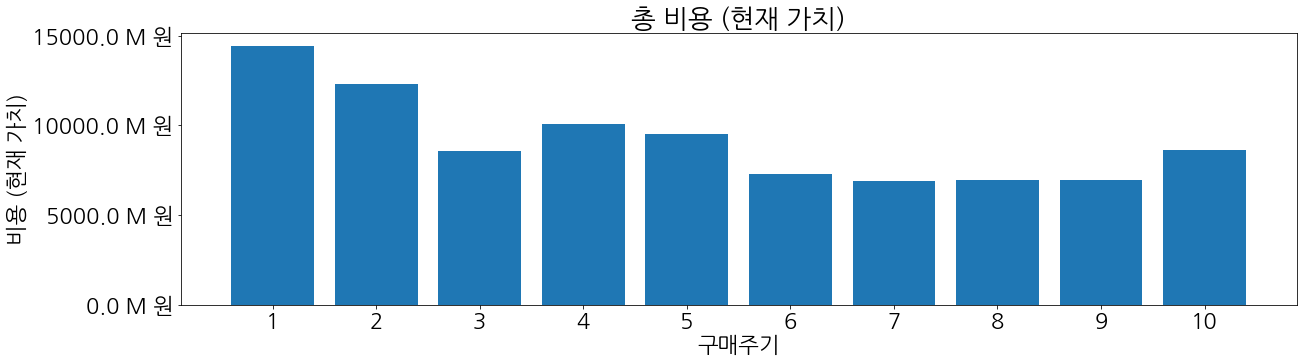

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
present_values = np.zeros(10)

for purchase_interval in range(1, 11):
    cash_flow = -net_cash_flow(purchase_interval, study_period=study_period)
    present_values[purchase_interval-1] = to_present_value(cash_flow, i_f)

plot_cash_flow(
    ax=ax,
    title='총 비용 (현재 가치)',
    data=present_values,
    x_range=range(1, 11),
    xlabel='구매주기',
    ylabel='비용 (현재 가치)')

## 4.2. 연간 비용

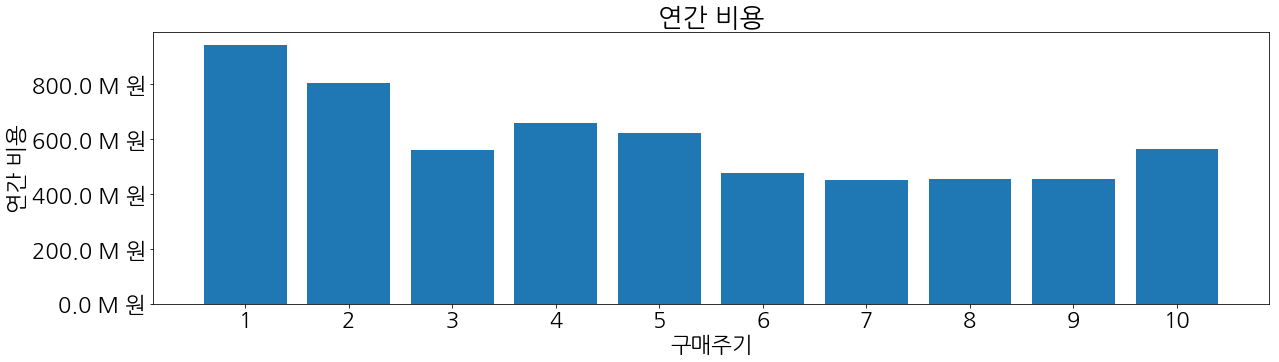

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
annual_values = np.zeros(10)

for purchase_interval in range(1, 11):
    cash_flow = -net_cash_flow(purchase_interval, study_period=study_period)
    present_value = to_present_value(cash_flow, i_f)
    annual_values[purchase_interval-1] = to_annual_value(present_value, study_period, i_f)

plot_cash_flow(
    ax=ax,
    title='연간 비용',
    data=annual_values,
    x_range=range(1, 11),
    xlabel='구매주기',
    ylabel='연간 비용')

# 5. 결론

In [34]:
optimal_purchase_interval = np.argmin(annual_values)+1
print(f'Study Period가 {study_period}년 일 때, {optimal_purchase_interval}년 마다 차를 사고 파는 것이 최적이다.')

Study Period가 20년 일 때, 7년 마다 차를 사고 파는 것이 최적이다.
